In [356]:
from sympy import simplify, lambdify, latex, Symbol
from sympy.abc import k, n, c
from sympy.concrete.summations import summation
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

p = Symbol('p', positive=True)

In [357]:
# Distribution parameters
_n = 25
_ns = np.array([5, 10, 15, 25])
_pis = np.array([0.2, 0.4, 0.6, 0.8])

In [358]:
# The PMF
pmf = p * (1 - p) ** (n - k)

pmf

p*(1 - p)**(-k + n)

In [359]:
# The CDF
cdf = (1 - p) ** (n - k)

cdf

(1 - p)**(-k + n)

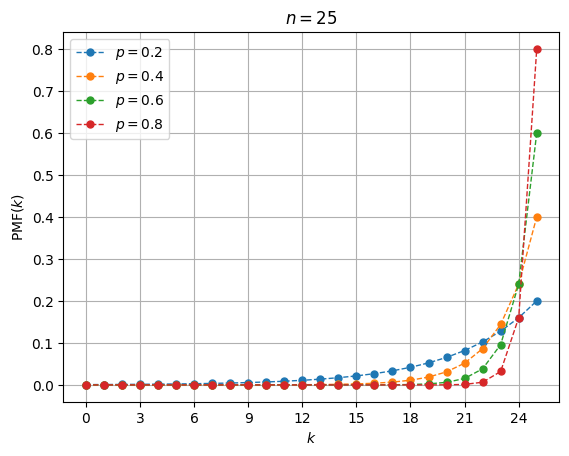

In [360]:
# Plot the PMF
_ks = np.arange(_n + 1)
pmf_l = lambdify((p, k, n), pmf)
pmf_lv = np.vectorize(pmf_l, excluded=['p', 'n'])

fig, ax = plt.subplots()
for _pi in _pis:
    ax.plot(_ks, pmf_lv(_pi, _ks, _n), label=f"$p={_pi}$", marker='o', linewidth=1, markersize=5, linestyle='dashed')
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("$k$")
ax.set_ylabel("PMF($k$)")
ax.set_title(f"$n={_n}$")
ax.grid()

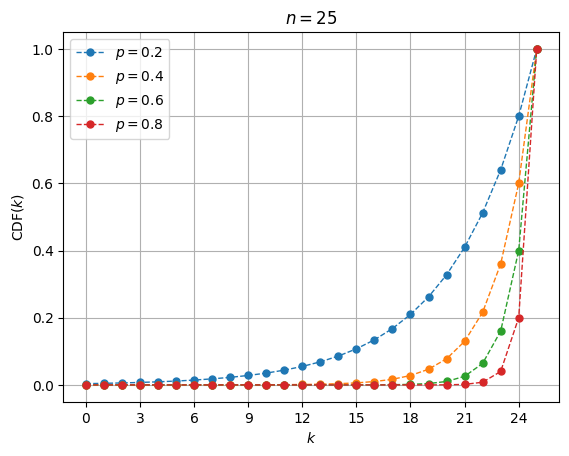

In [361]:
# Plot the CDF
_ks = np.arange(_n + 1)
cdf_l = lambdify((p, k, n), cdf)
cdf_lv = np.vectorize(cdf_l, excluded=['p', 'n'])

fig, ax = plt.subplots()
for _pi in _pis:
    ax.plot(_ks, cdf_lv(_pi, _ks, _n), label=f"$p={_pi}$", marker='o', linewidth=1, markersize=5, linestyle='dashed')
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("$k$")
ax.set_ylabel("CDF($k$)")
ax.set_title(f"$n={_n}$")
ax.grid()

In [362]:
ev = summation(k * pmf, (k, 0, n))
simplify(ev)

n - (1 - p)**n + 1 + (1 - p)**n/p - 1/p

In [363]:
ev_l = lambdify((p, n), ev)
ev_lv = np.vectorize(ev_l, excluded=['n'])

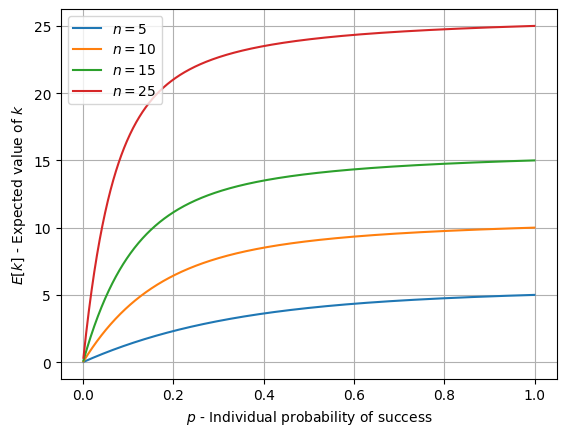

In [365]:
_ps = np.linspace(0.001,0.999,1000)
fig, ax = plt.subplots()
for _ni in _ns:
    ax.plot(_ps, ev_lv(_ps, _ni), label=f"$n={_ni}$")
ax.legend()
ax.set_xlabel("$p$ - Individual probability of success")
ax.set_ylabel("$E[k]$ - Expected value of $k$")
ax.grid()

In [366]:
# Variance
var = summation((k**2)*p*(1-p)**(n-k), (k, 0, n))-ev**2
var

-(n*p - p*(1 - p)**n + p + (1 - p)**n - 1)**2/p**2 + (n**2*p**2 + 2*n*p**2 - 2*n*p - p**2*(1 - p)**n + p**2 + 3*p*(1 - p)**n - 3*p - 2*(1 - p)**n + 2)/p**2

In [367]:
simplify(var)

2*n*(1 - p)**n - 2*n*(1 - p)**n/p - (1 - p)**(2*n) + (1 - p)**n + 2*(1 - p)**(2*n)/p - (1 - p)**n/p - 1/p - (1 - p)**(2*n)/p**2 + p**(-2)

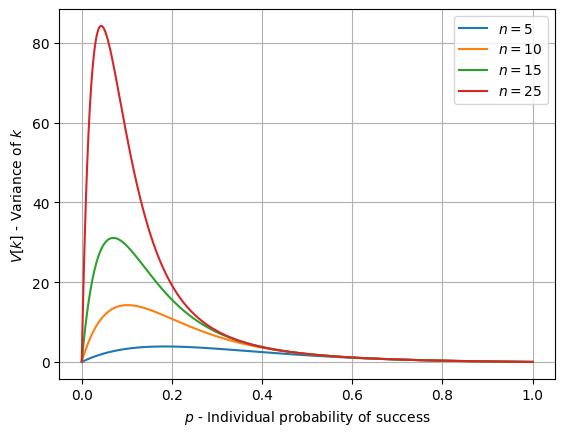

In [368]:
var_l = lambdify((p, n), var)

var_lv = np.vectorize(var_l, excluded=['n', 'k'])
ps = np.linspace(0.00001, 1, 1000)
fig, ax = plt.subplots()
for _ni in _ns:
    ax.plot(ps, var_lv(ps, _ni), label=f"$n={_ni}$")
ax.set_xlabel("$p$ - Individual probability of success")
ax.set_ylabel("$V[k]$ - Variance of $k$")

ax.legend()
ax.grid()